## Bike Sharing Case Study 

### Problem Statement 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

#### Business Goal:

to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [519]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [520]:
#import the useful libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Setting the options to display max rows and max columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

#Setting the options to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

In [521]:
bikeSharing = pd.read_csv("day.csv")

In [522]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [523]:
bikeSharing.shape

(730, 16)

In [524]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [525]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [526]:
bikeSharing.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [527]:
#Droping the instant column as it is just having index number of the dataset
bikeSharing.drop(['instant'], axis=1, inplace=True)

In [528]:
#We are already having month columns so we can drop dteday column
bikeSharing.drop(['dteday'], axis=1, inplace=True)

In [529]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


## Step 2: Visualising the Data

In [530]:
#Lets first Define Function Univariate.
def univariate_check(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col, ax=ax[1], orient='h')
        plt.show()

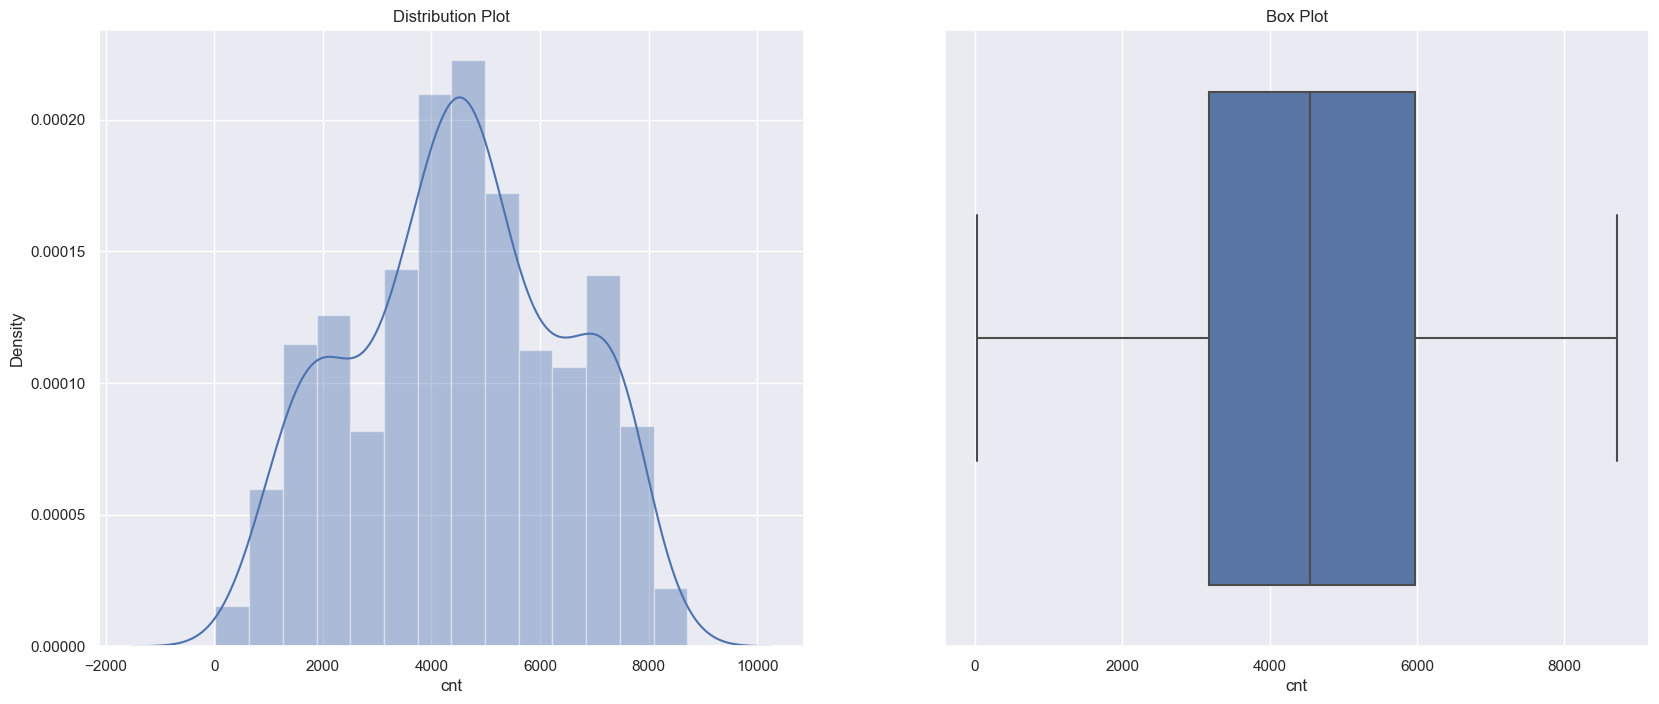

In [531]:
# check the univariat on cnt column
univariate_check(df=bikeSharing, col='cnt')

##### Assumption - From the above image it looks the data is equally distributated from 0 to 10000 and its mean is around 4500 

In [532]:
# Now, The target variable cnt is the sum of registered and casual columns. so, these are not required in our analysis 
# drop registered and casual columns. 

bikeSharing.drop(['registered','casual'], axis=1, inplace=True)

In [533]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,985
1,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,801
2,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,1349
3,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,1562
4,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,1600


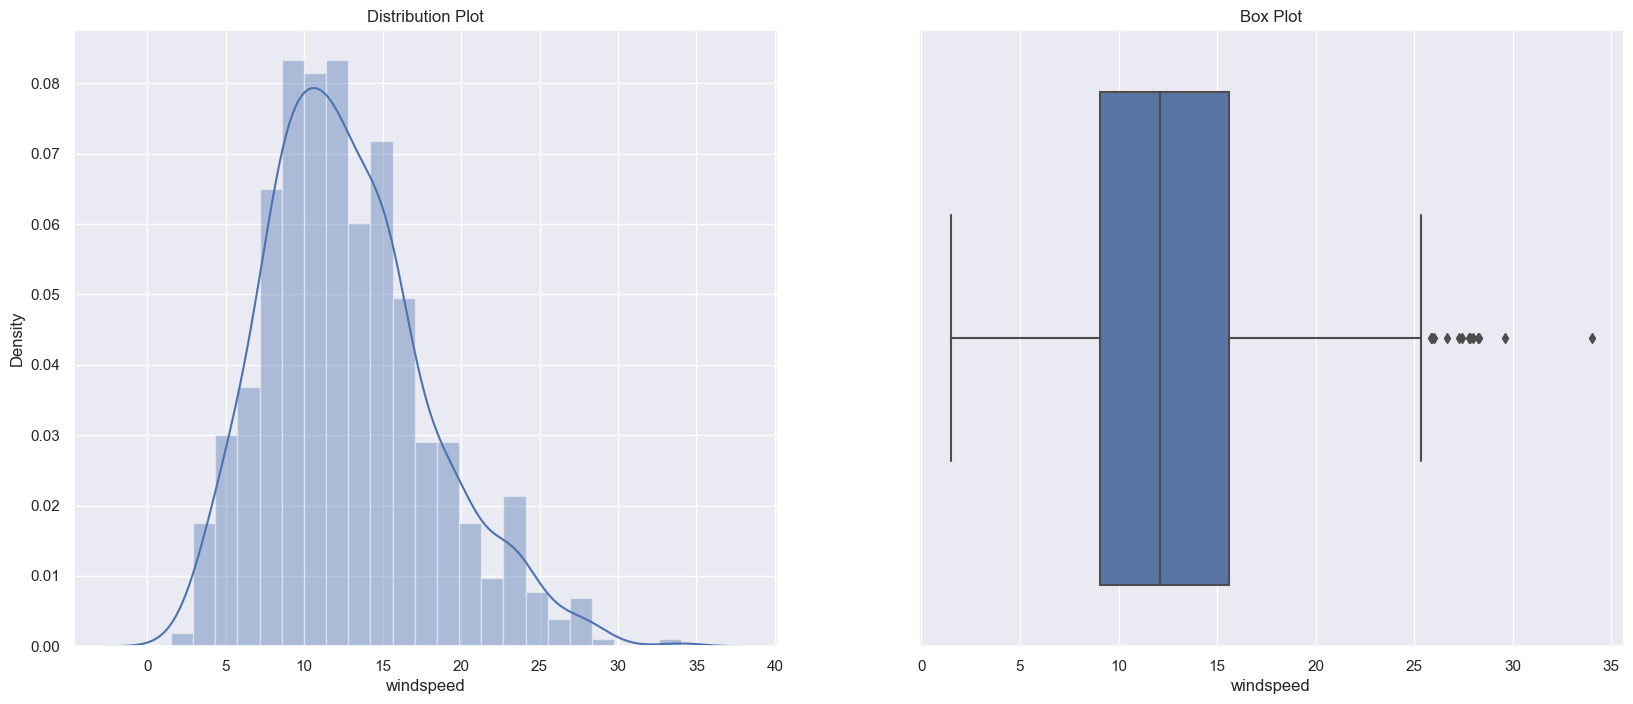

In [534]:
#check Univariate analysis on windspeed
univariate_check(df=bikeSharing,col='windspeed')

#### Assumption - From the above image it looks the windspeed data is equally distributated from 0 to 30 and its mean is around 12

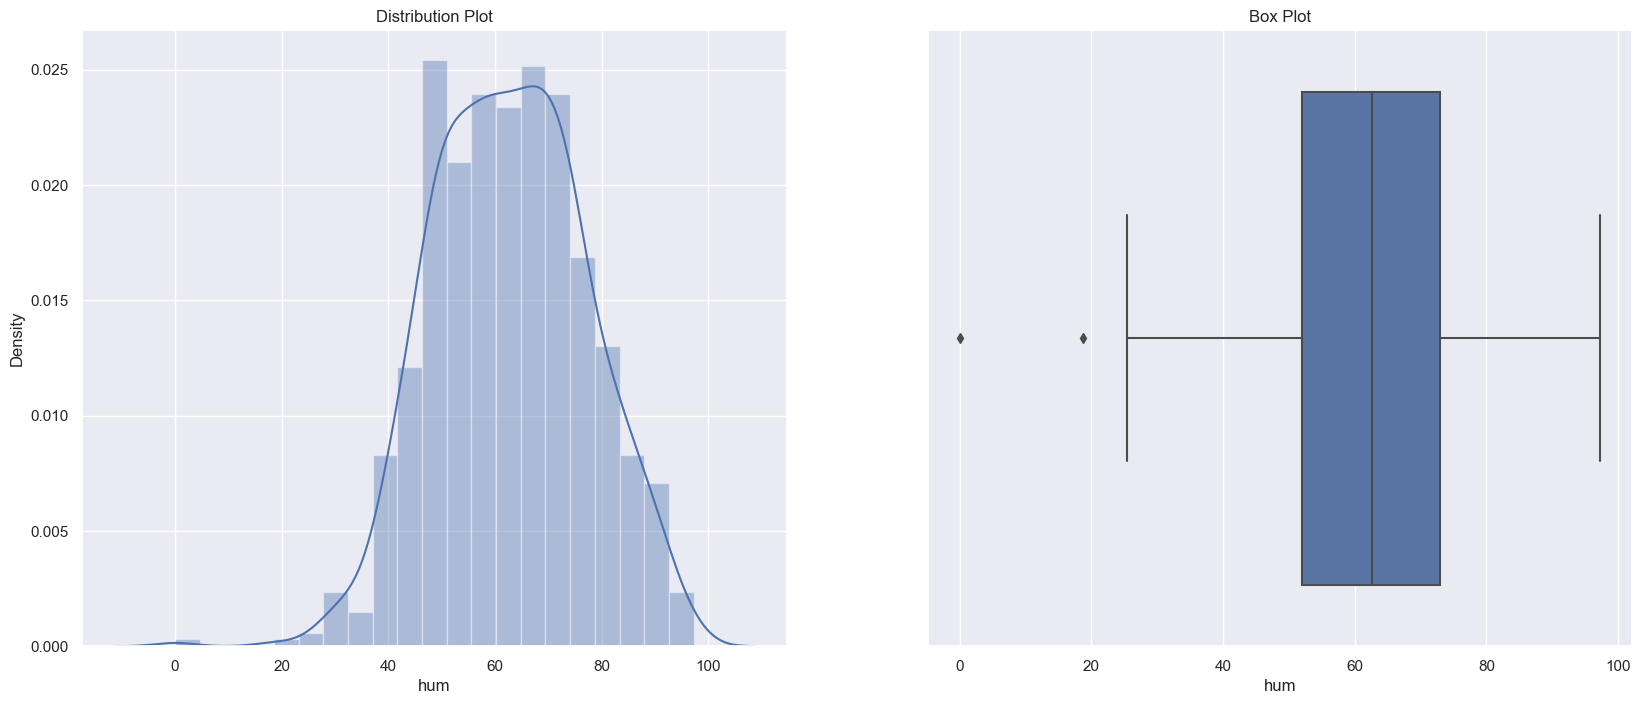

In [535]:
#check Univariate analysis on hum
univariate_check(df=bikeSharing, col='hum')

#### Assumption :  humudity column data is right skewed normal distribution with mean of 62

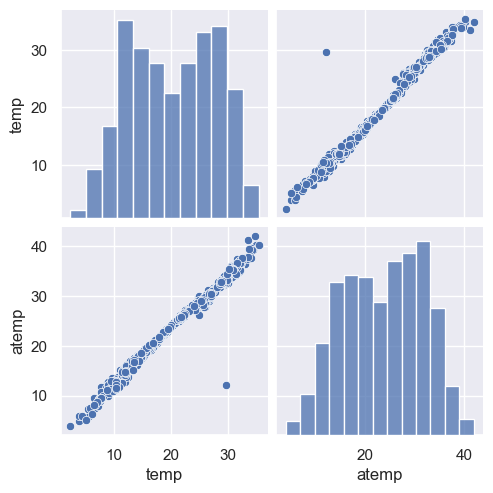

In [536]:
#check Univariate analysis on atemp & temp 
sns.pairplot(bikeSharing[['temp','atemp']])
plt.show()

#### Assumption : both temp and atemp variable are very much correlated with each other so we can drop any one of them. 
#### here I am droping atemp variable

In [537]:
bikeSharing.drop(['atemp'], axis=1, inplace=True)

In [538]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.1108,80.5833,10.7499,985
1,1,0,1,0,0,0,2,14.9026,69.6087,16.6521,801
2,1,0,1,0,1,1,1,8.0509,43.7273,16.6367,1349
3,1,0,1,0,2,1,1,8.2000,59.0435,10.7398,1562
4,1,0,1,0,3,1,1,9.3052,43.6957,12.5223,1600


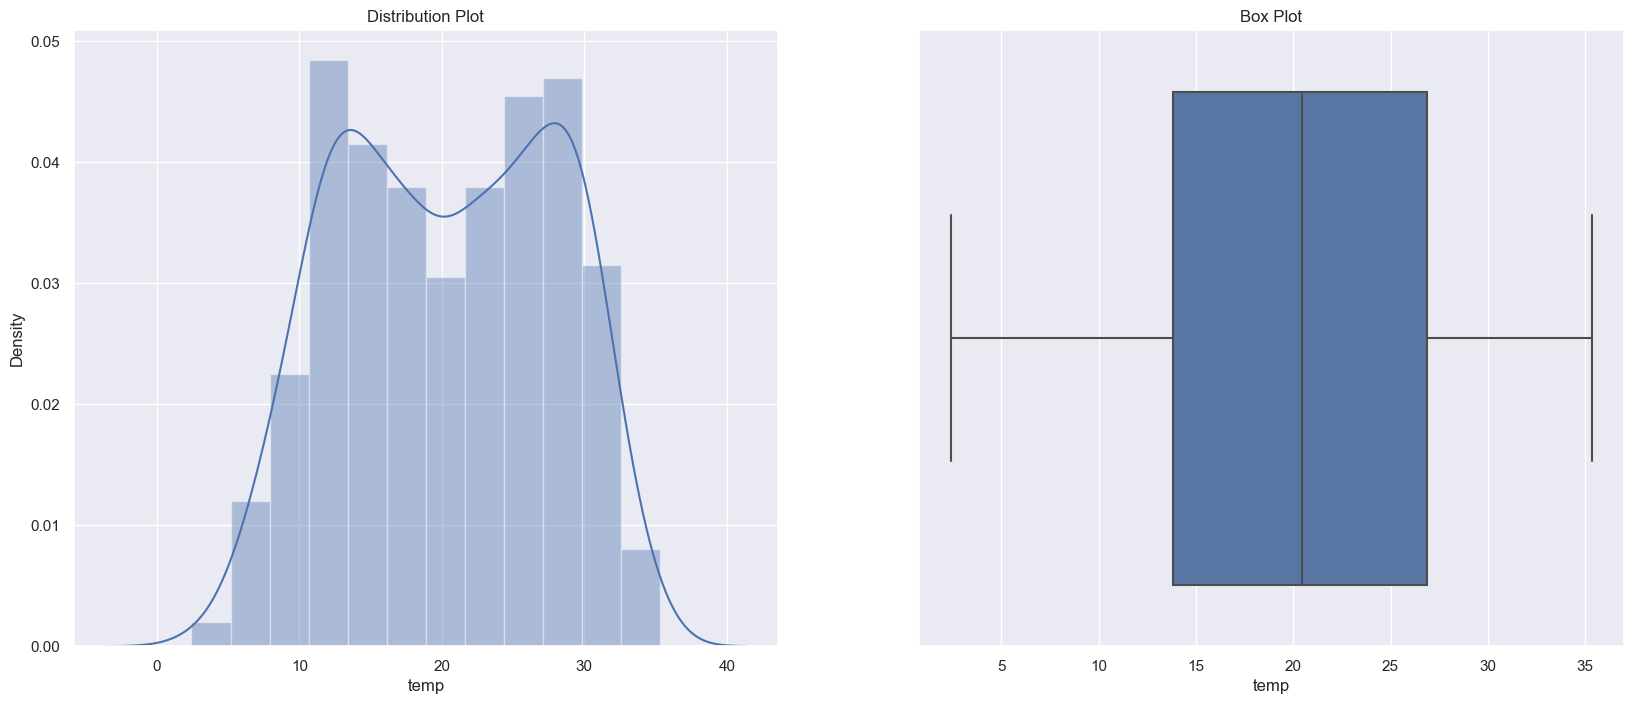

In [539]:
# now checking Univariate analysis on temp
univariate_check(df=bikeSharing,col='temp')

#### Assumption : temp column data is right skewed normal distribution with mean of 20

#### Correlation Matrix and Heat Map

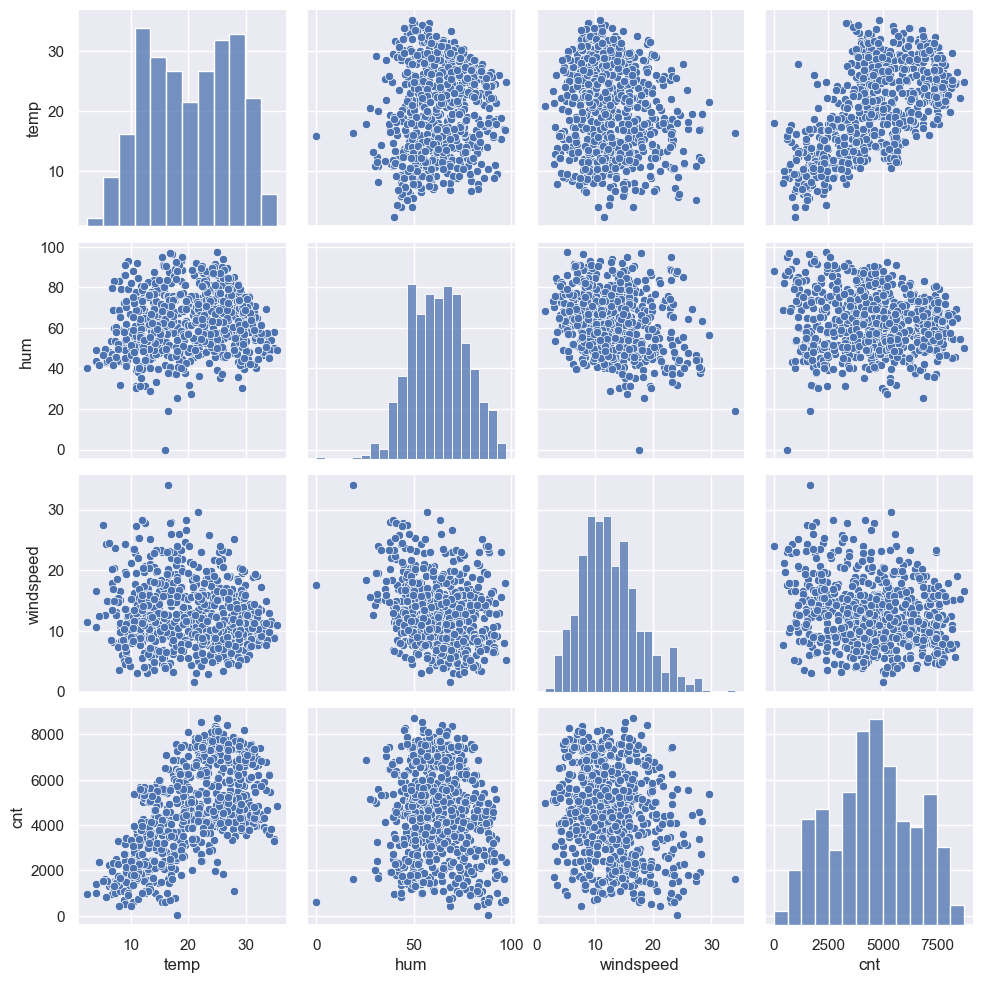

In [540]:
sns.pairplot(bikeSharing[['temp','hum','windspeed','cnt']])
plt.show()

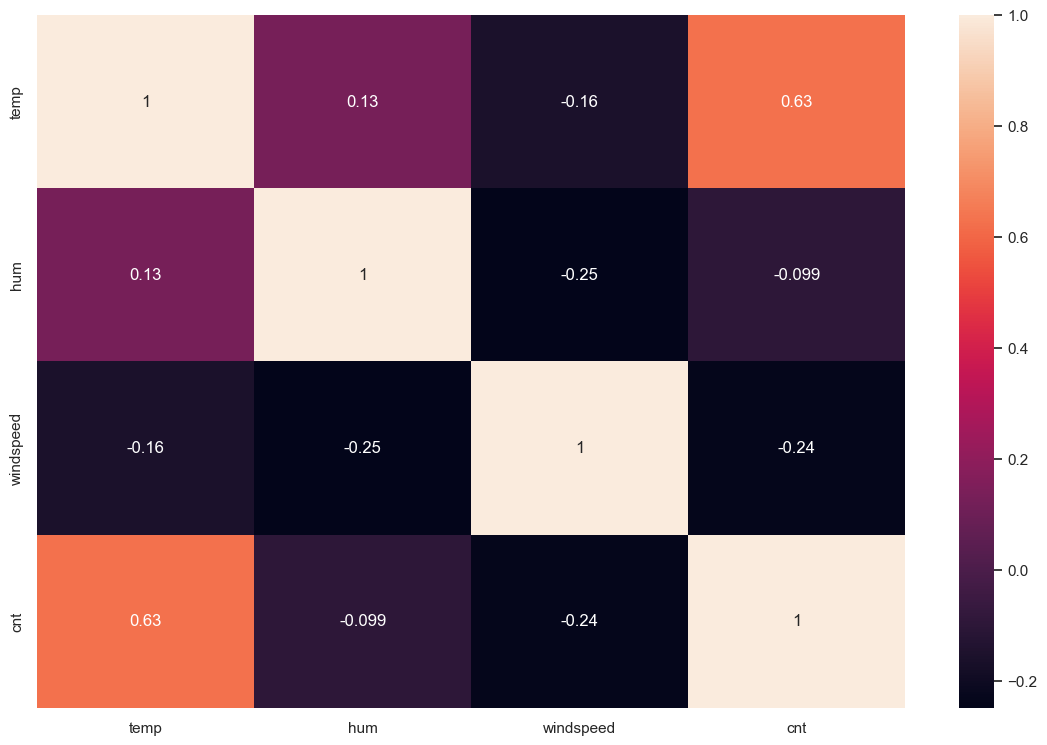

In [541]:
corr_df = bikeSharing[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

#### By looking at the pair plot temp variable has the highest (0.63) correlation with target variable 'cnt'.

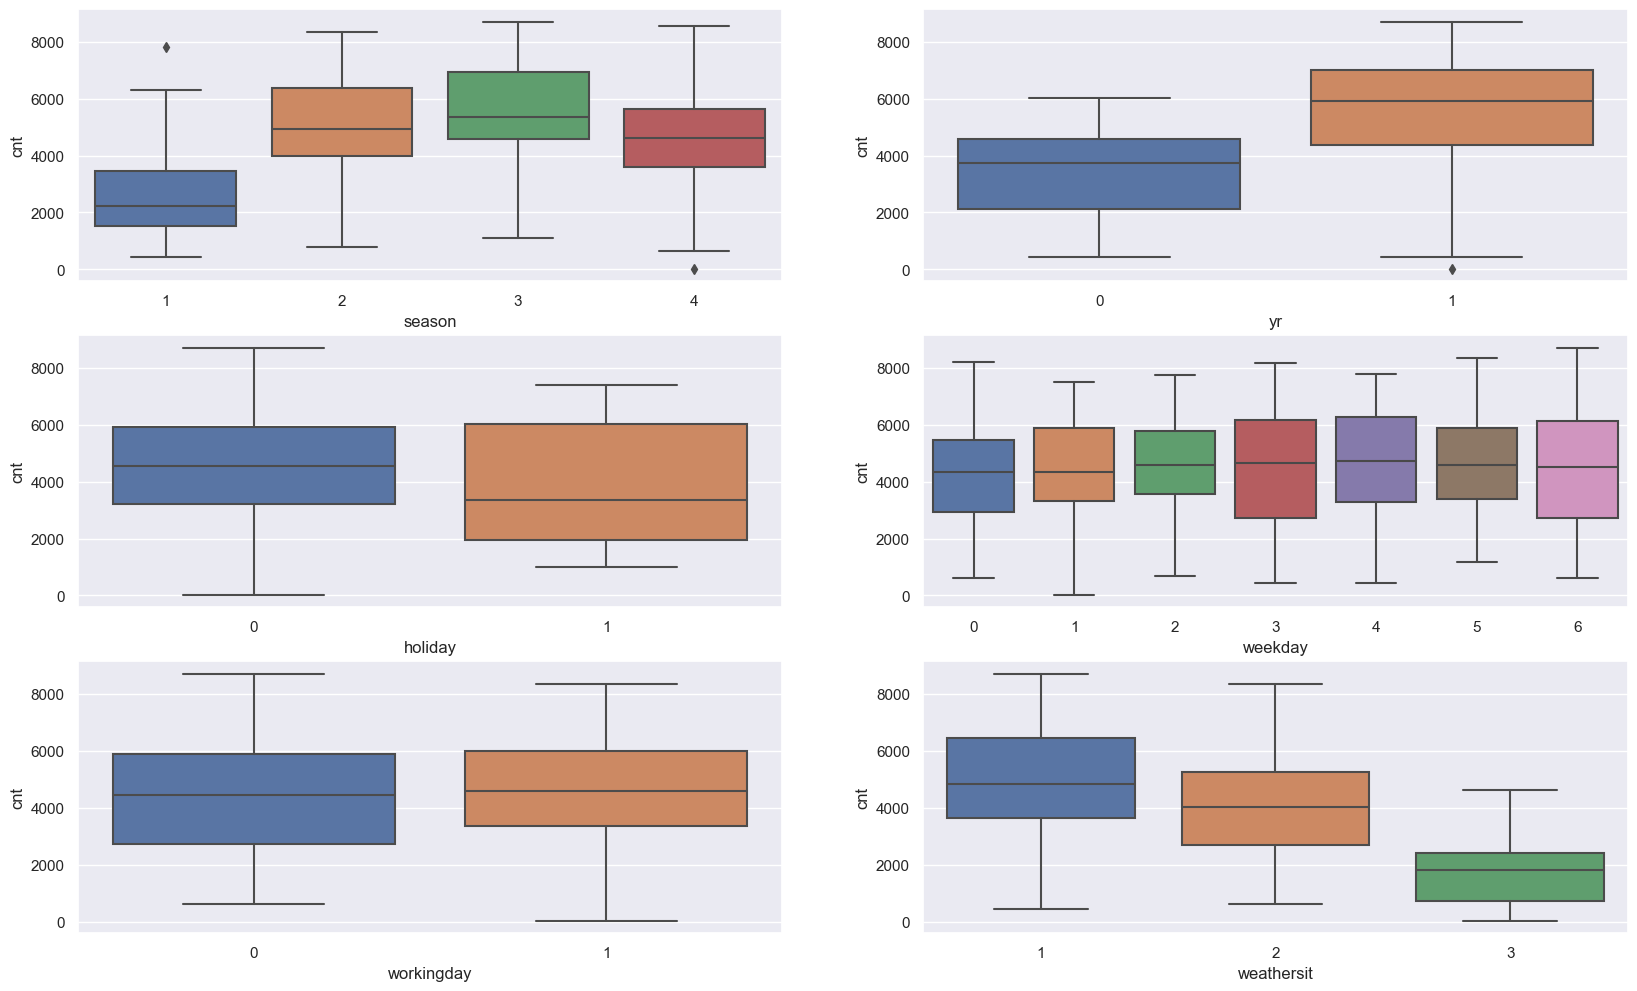

In [542]:
# Visualising Categorical Variables:

plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.show()

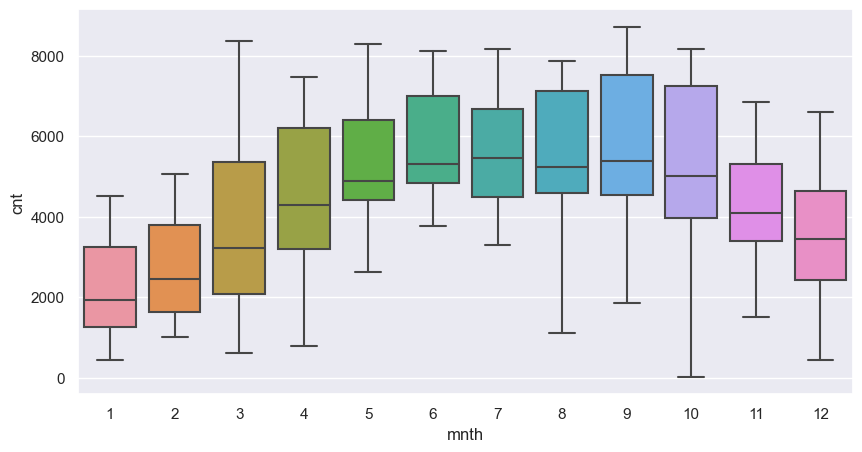

In [543]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.show()

### Observations

* The year box plots indicates that more bikes are rent during 2019.
* The season box plots indicates that more bikes are rent during fall season.
* The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.
* The month box plots indicates that more bikes are rent during september month.
* The weekday box plots indicates that more bikes are rent during saturday.
* The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.

## Step 3: Data Preparation:

In [544]:
bikeSharing.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [545]:
#convert the numbers to actual season name

def convert_season(x):
    if x == 1:
        return 'spring'
    elif x == 2 :
        return 'summer'
    elif x == 3 :
        return 'fall'
    else:
        return 'winter'
    
bikeSharing['season'] = bikeSharing['season'].apply(convert_season)

In [546]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.1108,80.5833,10.7499,985
1,spring,0,1,0,0,0,2,14.9026,69.6087,16.6521,801
2,spring,0,1,0,1,1,1,8.0509,43.7273,16.6367,1349
3,spring,0,1,0,2,1,1,8.2000,59.0435,10.7398,1562
4,spring,0,1,0,3,1,1,9.3052,43.6957,12.5223,1600


In [547]:
bikeSharing.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [548]:
# convert numbers into actual month in mnth column 

def convert_month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

bikeSharing['mnth']=bikeSharing[['mnth']].apply(convert_month)

In [549]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.1108,80.5833,10.7499,985
1,spring,0,Jan,0,0,0,2,14.9026,69.6087,16.6521,801
2,spring,0,Jan,0,1,1,1,8.0509,43.7273,16.6367,1349
3,spring,0,Jan,0,2,1,1,8.2000,59.0435,10.7398,1562
4,spring,0,Jan,0,3,1,1,9.3052,43.6957,12.5223,1600


In [550]:
bikeSharing.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [551]:
# convert yr numbers to actual year 

def convert_year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

bikeSharing['yr'] = bikeSharing['yr'].apply(convert_year)

In [552]:
bikeSharing.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,6,0,2,14.1108,80.5833,10.7499,985
1,spring,2018,Jan,0,0,0,2,14.9026,69.6087,16.6521,801


In [553]:
bikeSharing.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [554]:
# convert weekday numbers to actual day name

def convert_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikeSharing['weekday']=bikeSharing[['weekday']].apply(convert_weekday)


In [555]:
bikeSharing.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,2,14.1108,80.5833,10.7499,985
1,spring,2018,Jan,0,Sun,0,2,14.9026,69.6087,16.6521,801
2,spring,2018,Jan,0,Mon,1,1,8.0509,43.7273,16.6367,1349
3,spring,2018,Jan,0,Tue,1,1,8.2000,59.0435,10.7398,1562
4,spring,2018,Jan,0,Wed,1,1,9.3052,43.6957,12.5223,1600


In [556]:
bikeSharing.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [557]:
# convert weathersit numbers to actual name

def convert_weather(x):
    return x.map({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

bikeSharing['weathersit']= bikeSharing[['weathersit']].apply(convert_weather)

In [558]:
bikeSharing.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.1108,80.5833,10.7499,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.9026,69.6087,16.6521,801
2,spring,2018,Jan,0,Mon,1,Clear,8.0509,43.7273,16.6367,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.2000,59.0435,10.7398,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.3052,43.6957,12.5223,1600


### Creating Dummy Variables

* We can create dummy variables on categorical variables season,yr, mnth, weekday, and weathersit.

In [559]:
bikeSharing = pd.get_dummies(data=bikeSharing, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)

In [560]:
bikeSharing.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,0,14.1108,80.5833,10.7499,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,14.9026,69.6087,16.6521,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,1,8.0509,43.7273,16.6367,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,1,8.2000,59.0435,10.7398,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,1,9.3052,43.6957,12.5223,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## Step 4: Splitting the Data into Training and Testing Sets:

### Split the dataset to Train and Test data :

In [561]:
np.random.seed(0)
bikeSharing_train, bikeSharing_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [562]:
#checking shape of train and test dataframe
print("Train dataframe : ",bikeSharing_train.shape)
print("Test dataframe : ",bikeSharing_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


In [563]:
# If you observe windspeed, hum,temp and cnt have larger integer values, we can rescale the variables so that they have a comparable scale.

scaler = StandardScaler()

In [564]:
#We can apply scaller to all columns except dummy variables
scale_columns=['cnt','temp','hum','windspeed']
bikeSharing_train[scale_columns] = scaler.fit_transform(bikeSharing_train[scale_columns])

In [565]:
bikeSharing_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
653,0,1,-0.1213,-0.5147,-0.1178,1.5627,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
576,0,1,1.2317,0.5164,-0.3306,1.3996,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
426,0,0,-0.4205,-0.0699,-0.3857,-0.2156,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True
728,0,0,-1.2949,-1.0450,2.0181,-1.3795,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
482,0,0,-0.6276,-1.0008,-0.7799,-0.1366,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True


In [566]:
bikeSharing_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.0255,0.6765,-0.0000,-0.0000,-0.0000,-0.0000
std,0.1578,0.4683,1.0010,1.0010,1.0010,1.0010
min,0.0000,0.0000,-2.3812,-4.4626,-1.8910,-2.2891
25%,0.0000,0.0000,-0.8750,-0.7666,-0.7168,-0.7006
50%,0.0000,1.0000,0.0144,0.0229,-0.1415,0.0224
75%,0.0000,1.0000,0.8774,0.7168,0.5523,0.7625
max,1.0000,1.0000,2.0509,2.3990,4.0042,2.1677


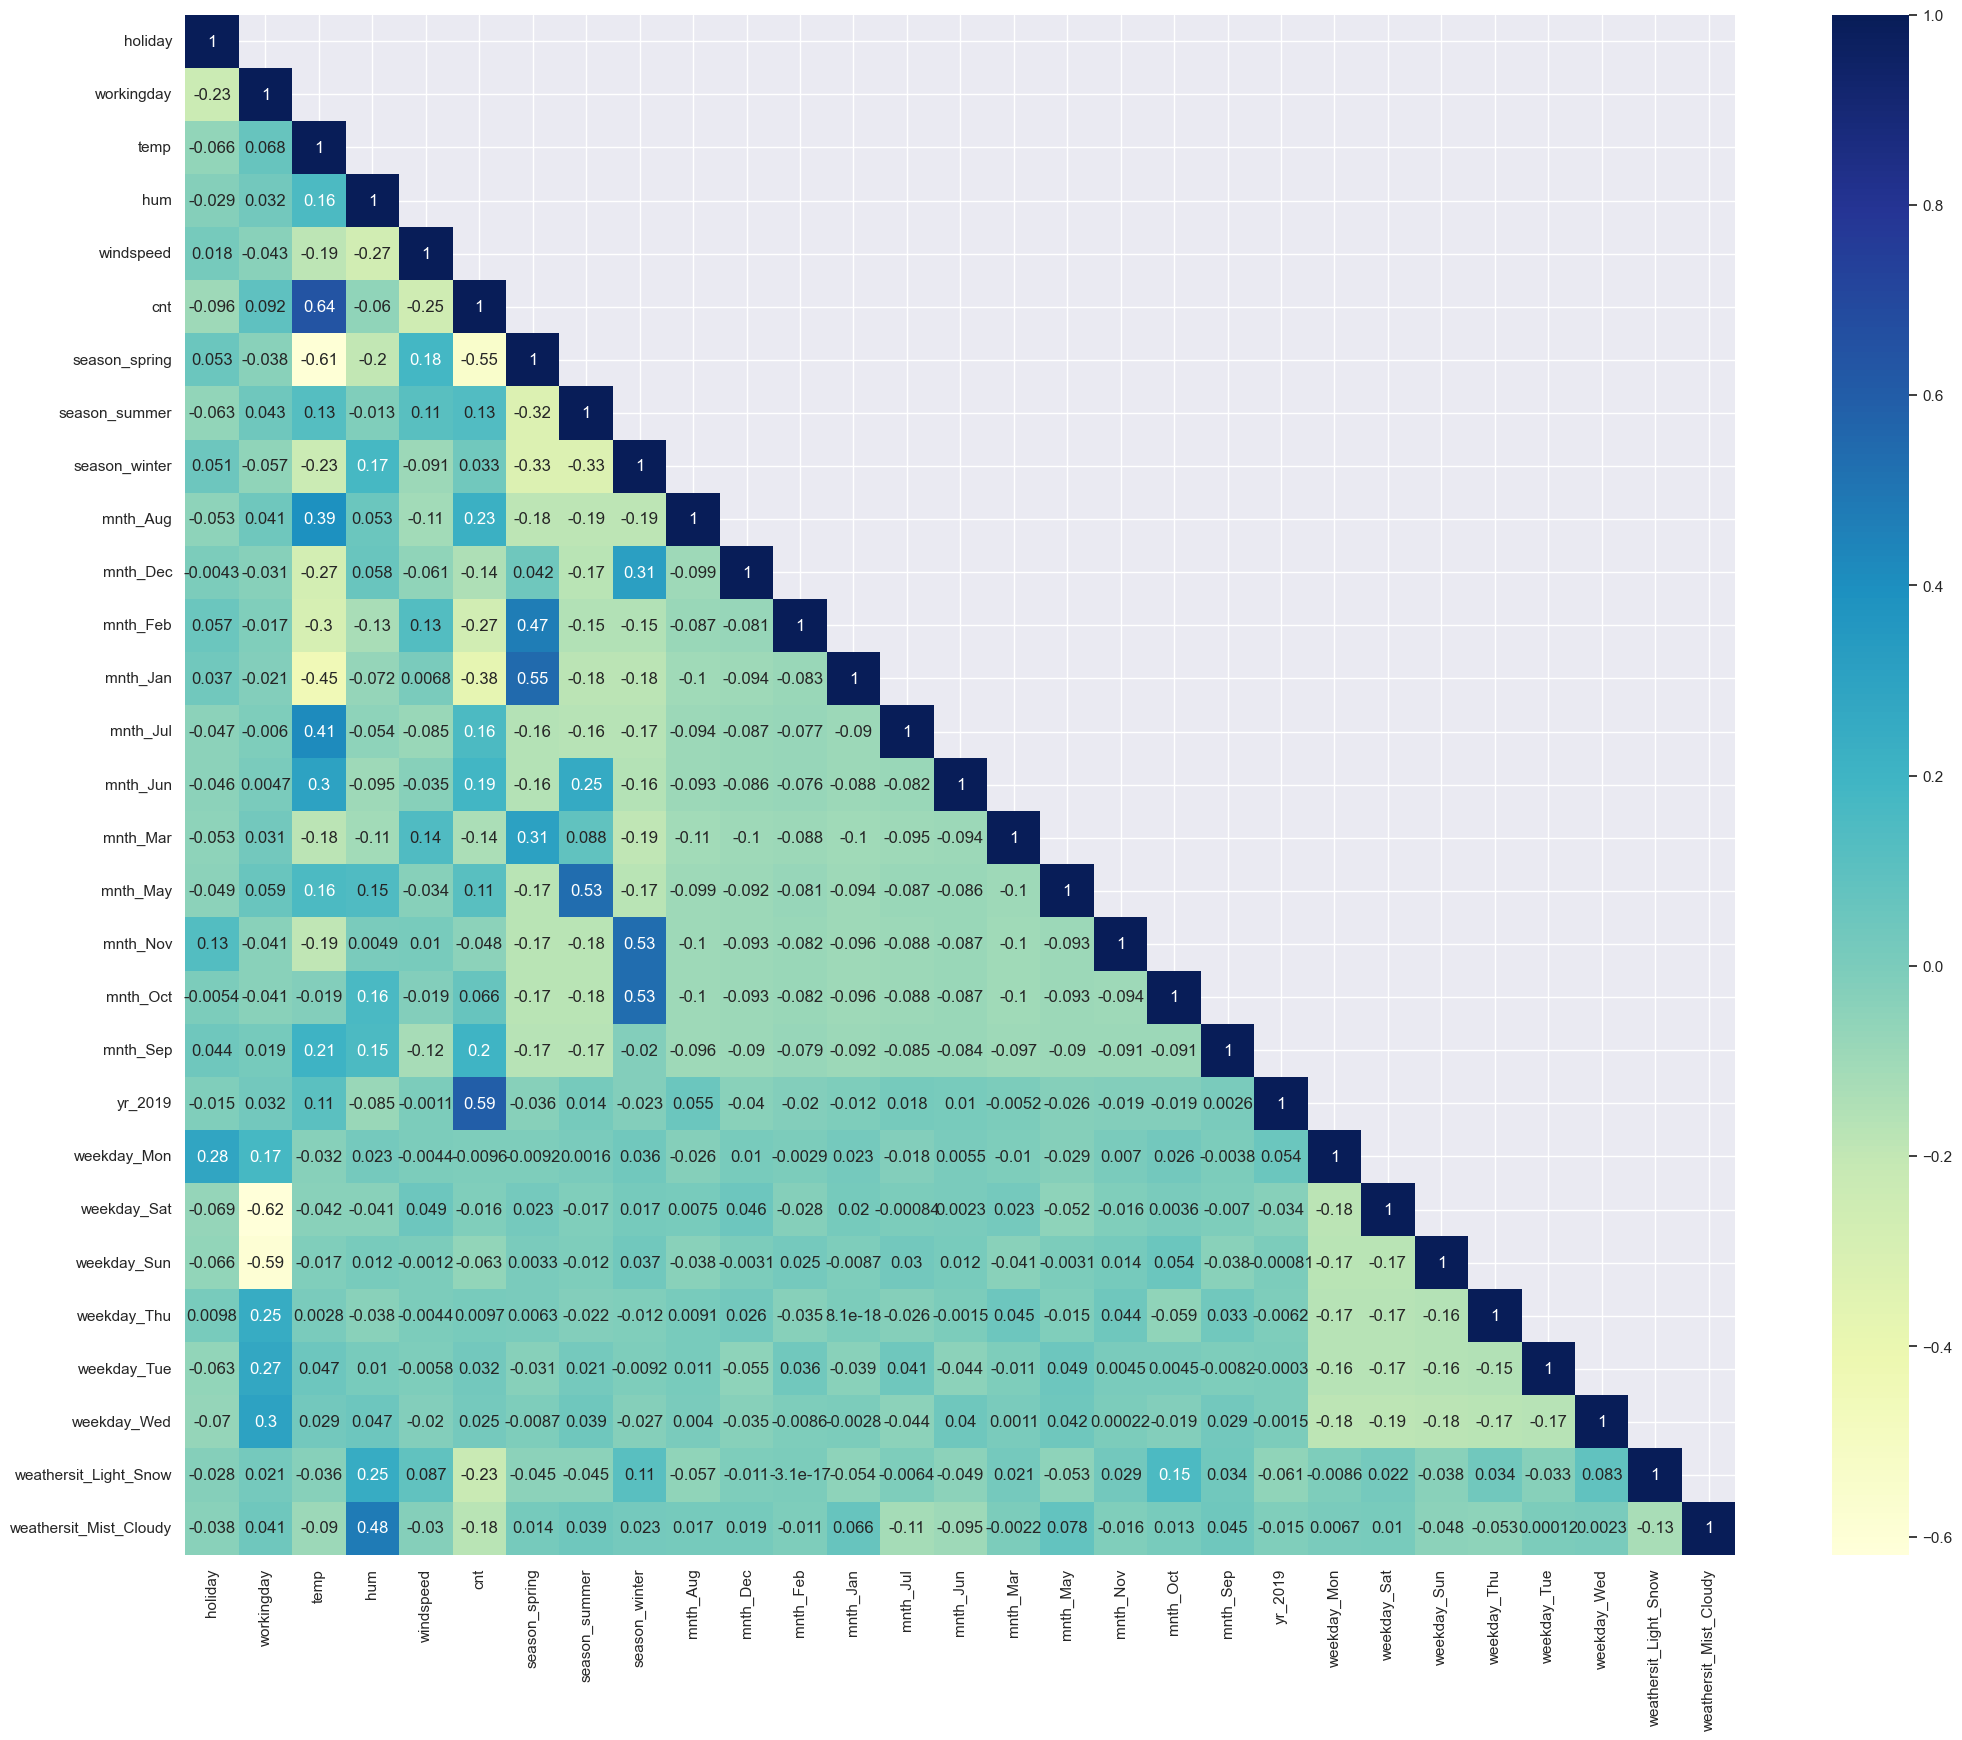

In [567]:
#Now we can plot correlation matrix for bb_train data
mask=np.array(bikeSharing_train.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (25, 20))
sns.heatmap(bikeSharing_train.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

#### looks the correlation with temp and cnt 

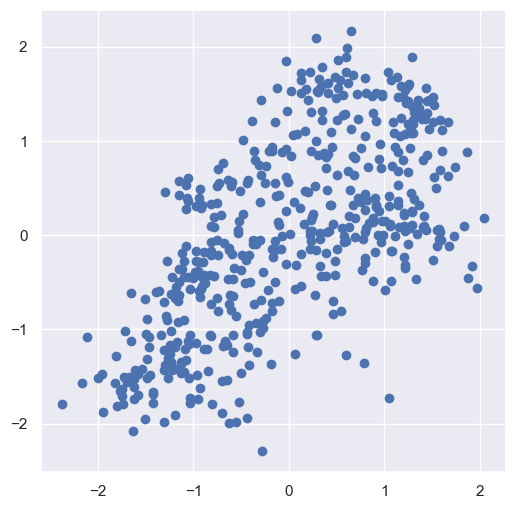

In [568]:
#Let's see a pairplot for temp vs cnt.

plt.figure(figsize=[6,6])
plt.scatter(bikeSharing_train.temp, bikeSharing_train.cnt)
plt.show()

####  So, lets pick temp as the first variable and let's try to fit a regression line to that.

In [569]:
# Dividing data into X and Y sets
y_train = bikeSharing_train.pop('cnt')
X_train = bikeSharing_train

In [570]:
X_train.shape

(510, 28)

In [571]:
y_train.shape

(510,)

## Step 5: Building a linear model:

In [572]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [573]:
# Check the parameters obtained
lr.params

const                    -0.4401
holiday                  -0.3387
workingday                0.0487
temp                      0.4531
hum                      -0.0983
windspeed                -0.1410
season_spring            -0.2146
season_summer             0.1726
season_winter             0.4717
mnth_Aug                  0.0642
mnth_Dec                 -0.2032
mnth_Feb                 -0.1439
mnth_Jan                 -0.2798
mnth_Jul                 -0.1798
mnth_Jun                 -0.0132
mnth_Mar                  0.0047
mnth_May                  0.1067
mnth_Nov                 -0.1865
mnth_Oct                  0.0336
mnth_Sep                  0.3613
yr_2019                   1.0345
weekday_Mon              -0.0932
weekday_Sat               0.0465
weekday_Sun              -0.1966
weekday_Thu              -0.0412
weekday_Tue              -0.0842
weekday_Wed              -0.0240
weathersit_Light_Snow    -1.1474
weathersit_Mist_Cloudy   -0.2722
dtype: float64

In [574]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.74e-182
Time:                        14:50:37   Log-Likelihood:                -234.21
No. Observations:                 510   AIC:                             524.4
Df Residuals:                     482   BIC:                             643.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### Dropping the Variable and Updating the Model:

#### As We know : 
- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect).
- A low p-value (< 0.05) indicates that you can reject the null hypothesis.
- Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [575]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.

X_train.drop(['mnth_Mar'], axis=1, inplace=True)

In [576]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [577]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.33e-183
Time:                        14:50:39   Log-Likelihood:                -234.22
No. Observations:                 510   AIC:                             522.4
Df Residuals:                     483   BIC:                             636.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [578]:
# We have high P value for mnth_Jun feature, so we can drop the column and fit the model again

X_train.drop(['mnth_Jun'], axis=1, inplace=True)

In [579]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [580]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.84e-184
Time:                        14:50:40   Log-Likelihood:                -234.23
No. Observations:                 510   AIC:                             520.5
Df Residuals:                     484   BIC:                             630.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [581]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again

X_train.drop(['mnth_Oct'], axis=1, inplace=True)

In [582]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [583]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.40e-185
Time:                        14:50:41   Log-Likelihood:                -234.26
No. Observations:                 510   AIC:                             518.5
Df Residuals:                     485   BIC:                             624.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [584]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.

X_train.drop(['weekday_Thu'], axis=1, inplace=True)

In [585]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [586]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.88e-186
Time:                        14:50:42   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             516.9
Df Residuals:                     486   BIC:                             618.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [587]:
# We have high P value for weekday_Sunday feature, so we can drop the column and fit the model again

X_train.drop(['weekday_Sun'], axis=1, inplace=True)

In [588]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [589]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.88e-186
Time:                        14:50:43   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             516.9
Df Residuals:                     486   BIC:                             618.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [590]:
# We have high P value for weekday_Wed feature, so we can drop the column and fit the model again

X_train.drop(['weekday_Wed'], axis=1, inplace=True)

In [591]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [592]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.87e-187
Time:                        14:50:44   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             514.9
Df Residuals:                     487   BIC:                             612.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [593]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,5.6600
5,season_spring,5.0300
2,temp,4.3400
7,season_winter,3.4400
6,season_summer,3.1300
11,mnth_Jan,2.5500
21,weathersit_Mist_Cloudy,2.3600
16,yr_2019,2.1000
8,mnth_Aug,2.0100
10,mnth_Feb,1.9800


#### The variable workingday has a significantly high VIF (5.66) and a high p-value (0.527) as well. Hence, this variable isn't of much use and should be dropped.

In [594]:
X_train.drop(['workingday'], axis=1, inplace=True)

In [595]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [596]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.87e-187
Time:                        14:50:46   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             514.9
Df Residuals:                     487   BIC:                             612.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [597]:
# We have high P value for mnth_Aug feature, so we can drop the column and fit the model again

X_train.drop(['mnth_Aug'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.82e-185
Time:                        14:50:46   Log-Likelihood:                -243.56
No. Observations:                 510   AIC:                             529.1
Df Residuals:                     489   BIC:                             618.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [598]:
# We have high P value for weekday_Tue feature, so we can drop the column and fit the model again

X_train.drop(['weekday_Tue'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.33e-186
Time:                        14:50:46   Log-Likelihood:                -243.56
No. Observations:                 510   AIC:                             527.1
Df Residuals:                     490   BIC:                             611.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [599]:
# We have high P value for weekday_Mon feature, so we can drop the column and fit the model again

X_train.drop(['weekday_Mon'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.93e-187
Time:                        14:50:46   Log-Likelihood:                -243.60
No. Observations:                 510   AIC:                             525.2
Df Residuals:                     491   BIC:                             605.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [600]:
# We have high P value for season_summer feature, so we can drop the column and fit the model again

X_train.drop(['season_summer'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.93e-188
Time:                        14:50:47   Log-Likelihood:                -244.84
No. Observations:                 510   AIC:                             525.7
Df Residuals:                     492   BIC:                             601.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [601]:
# We have high P value for weekday_Sat feature, so we can drop the column and fit the model again

X_train.drop(['weekday_Sat'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.45e-188
Time:                        14:50:47   Log-Likelihood:                -246.26
No. Observations:                 510   AIC:                             526.5
Df Residuals:                     493   BIC:                             598.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [602]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_spring,3.7300
1,temp,2.9700
5,season_winter,2.5800
8,mnth_Jan,2.4500
7,mnth_Feb,1.9400
15,weathersit_Mist_Cloudy,1.9300
11,mnth_Nov,1.8700
13,yr_2019,1.8400
2,hum,1.7500
6,mnth_Dec,1.6700


#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data:

In [603]:
y_train_pred = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

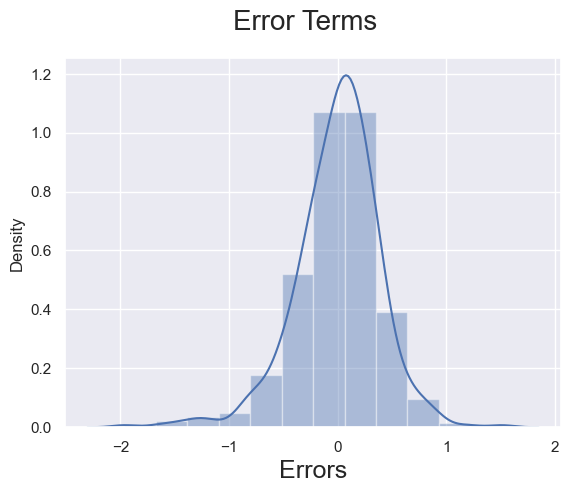

In [604]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Step 8: Making Predictions Using the Final Model:

In [605]:
num_columns=['cnt','temp','hum','windspeed']
bikeSharing_test[num_columns] = scaler.transform(bikeSharing_test[num_columns])

In [606]:
bikeSharing_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 219 non-null    int64  
 1   workingday              219 non-null    int64  
 2   temp                    219 non-null    float64
 3   hum                     219 non-null    float64
 4   windspeed               219 non-null    float64
 5   cnt                     219 non-null    float64
 6   season_spring           219 non-null    bool   
 7   season_summer           219 non-null    bool   
 8   season_winter           219 non-null    bool   
 9   mnth_Aug                219 non-null    bool   
 10  mnth_Dec                219 non-null    bool   
 11  mnth_Feb                219 non-null    bool   
 12  mnth_Jan                219 non-null    bool   
 13  mnth_Jul                219 non-null    bool   
 14  mnth_Jun                219 non-null    bool  

#### Dividing into X_test and y_test

In [607]:
y_test = bikeSharing_test.pop('cnt')
X_test = bikeSharing_test

In [608]:
y_test.shape

(219,)

In [609]:
X_test.shape

(219, 28)

In [610]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [611]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'yr_2019', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [612]:
X_test_m.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr_2019',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [613]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_Mar','mnth_Jun','mnth_Oct','weekday_Thu','weekday_Sun','weekday_Wed','workingday','mnth_Aug','weekday_Tue','weekday_Mon','season_summer','weekday_Sat']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [615]:
y_pred_m = lr_11.predict(X_test_m)

## Step 9: Model Evaluation:

#### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

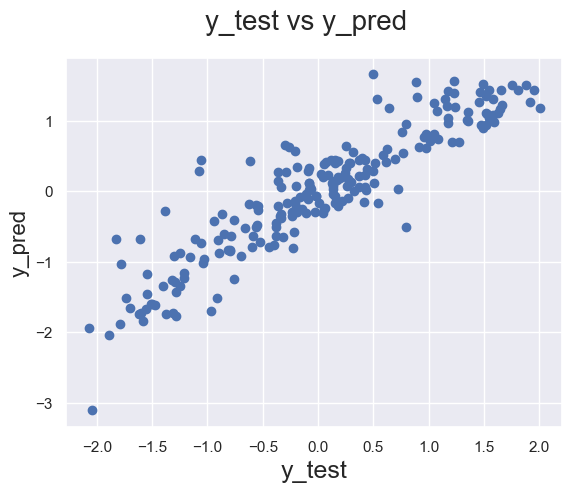

In [616]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### R-squared score

In [617]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))

Train R-Score:  0.8462086237488686
Test R-Score:  0.827980817130078


In [618]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'yr_2019', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')